In [12]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

PLOT_PREFIX = "Figures/FACES_SVM_PLOT_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_SVM_DATA"

In [13]:
import SVMs.common_SVM as common_SVM
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

C = [i for i in range(1, 15)]
gamma = [i for i in range(1, 10)]
C = [.1, .5, 1, 5, 10]
gamma = [1, 0.1, 0.01, 0.001]
kernel = ["linear", "rbf", "poly"]
degree = [3, 4]
parameters = {"kernel": kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train, GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/FACES_SVM_PLOT_GS_ModelComplexity_C_gamma_kernel.png


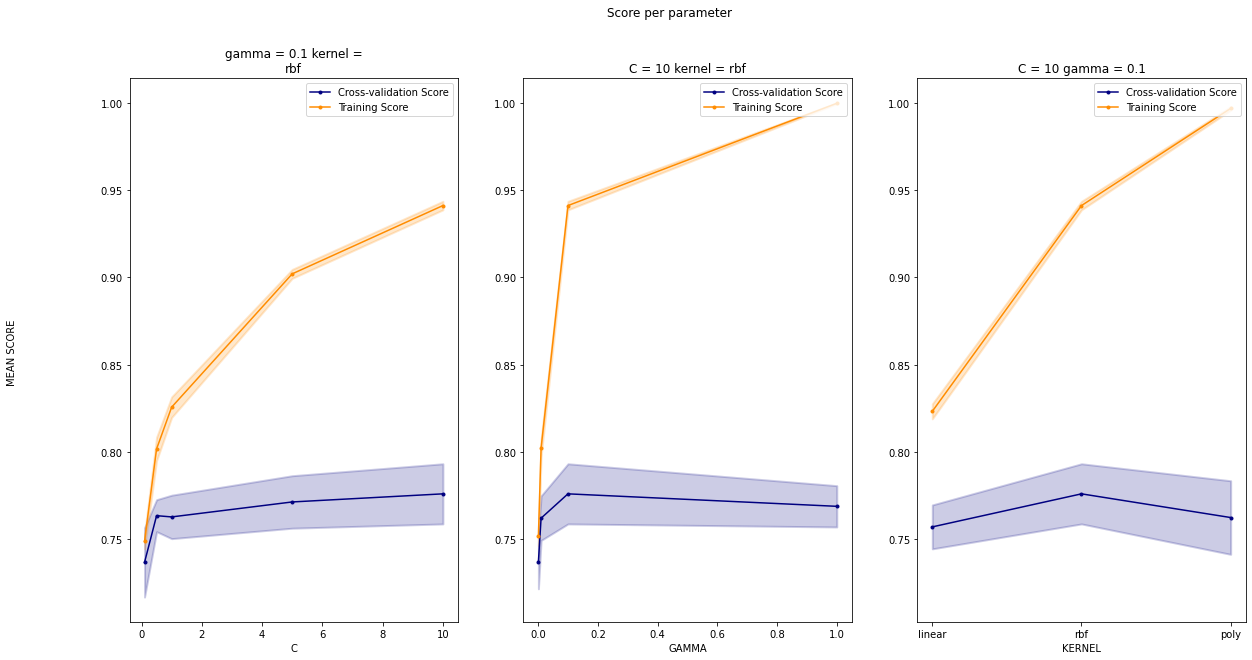

In [14]:
unused_params_values = {'gamma': 1, 'C': 1}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_SVM_PLOT_GS_Times_C_gamma_kernel.png


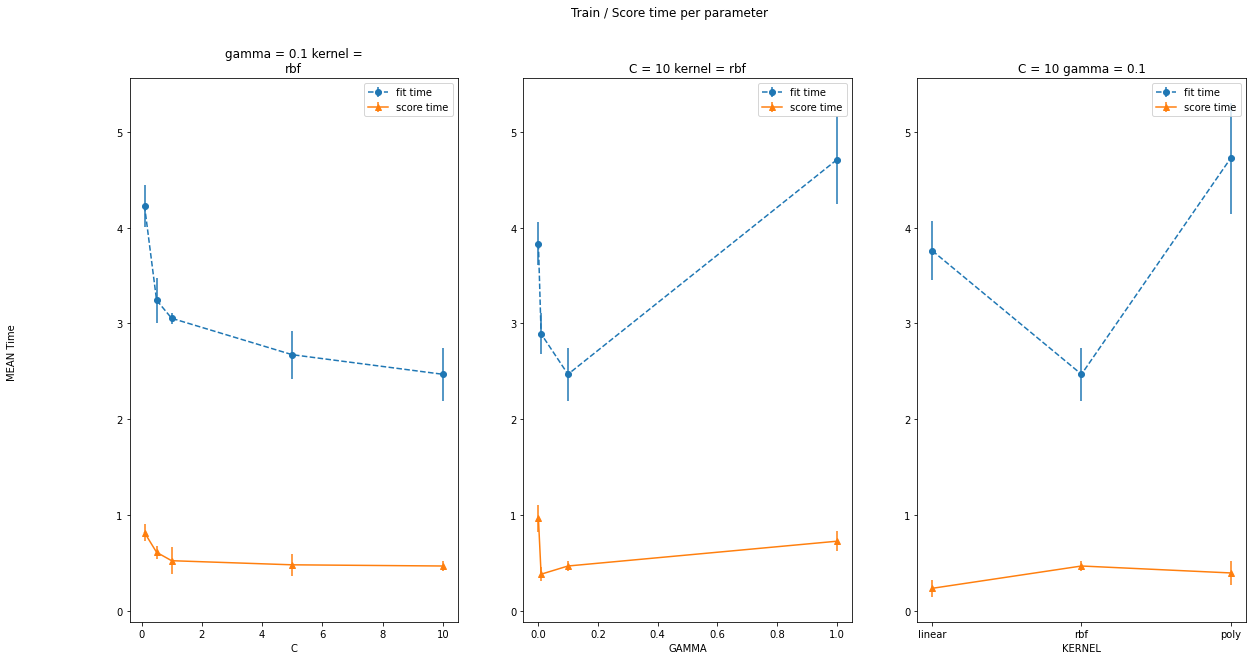

In [15]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_SVM_PLOT_GridScore_kernel_gamma_0.png


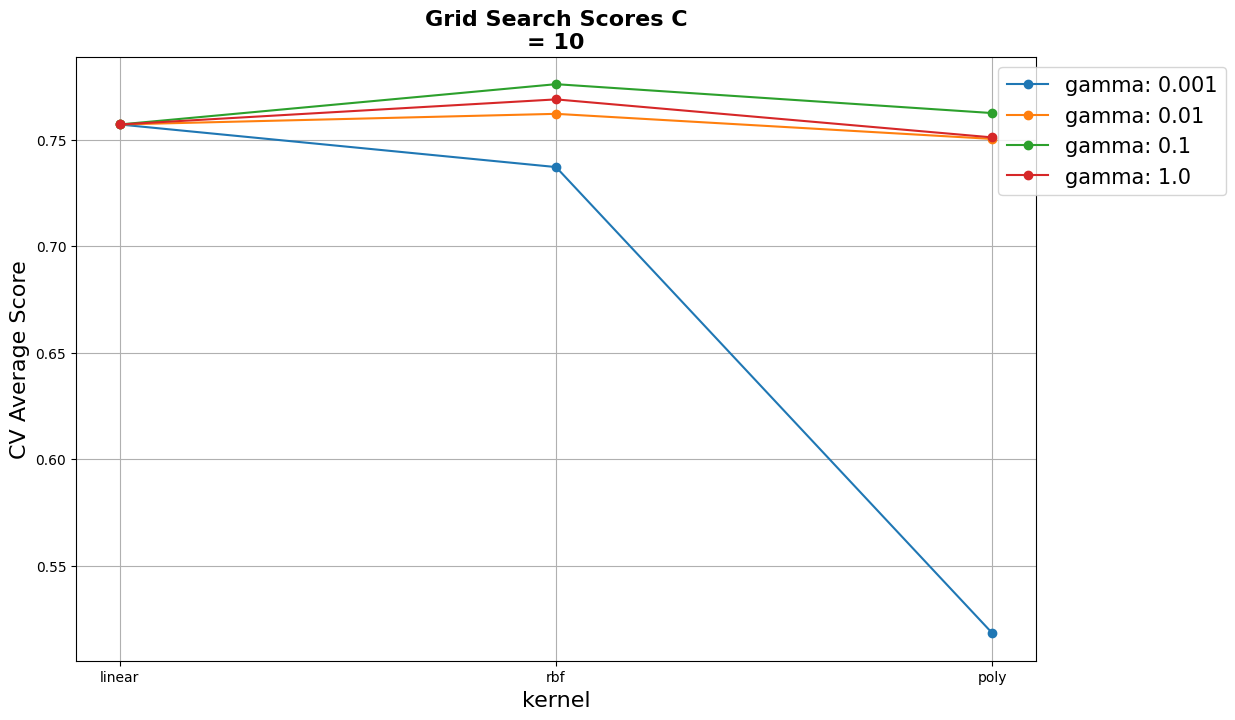

In [16]:
mean_score_limit=0.5
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_split_10.png


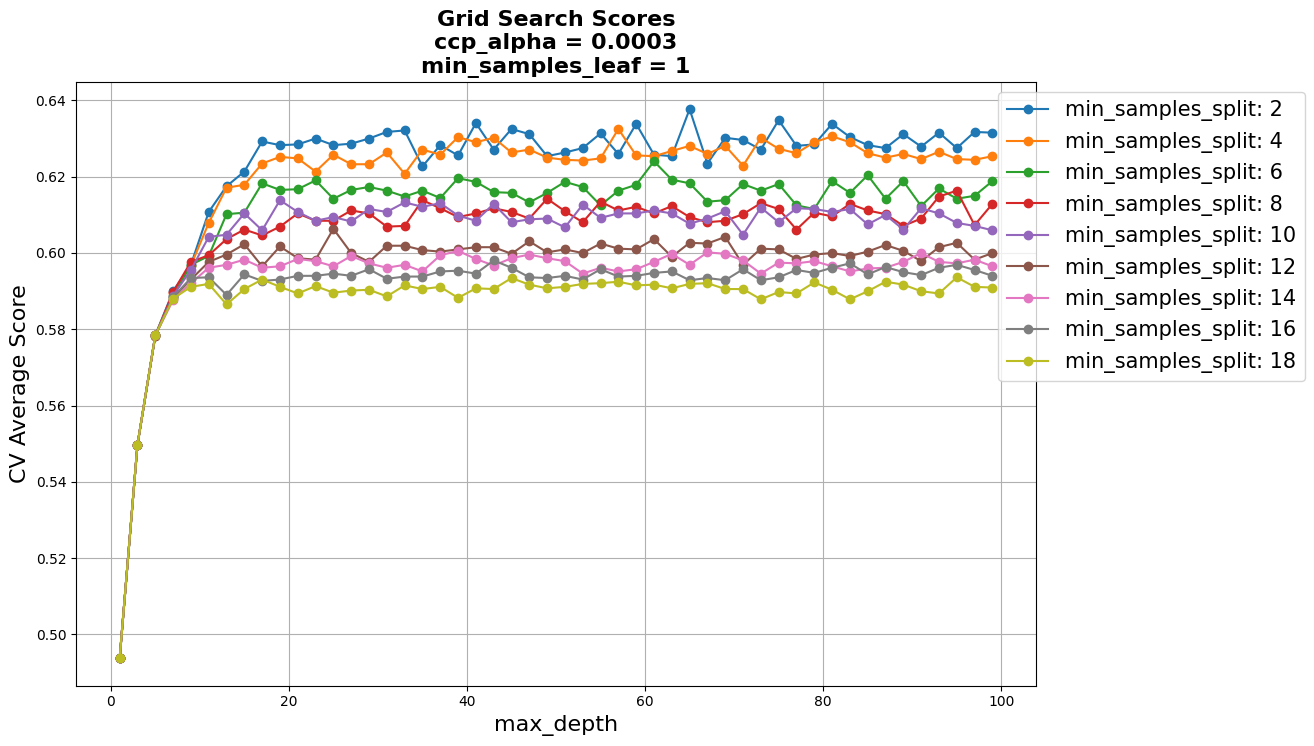

In [23]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_leaf_11.png


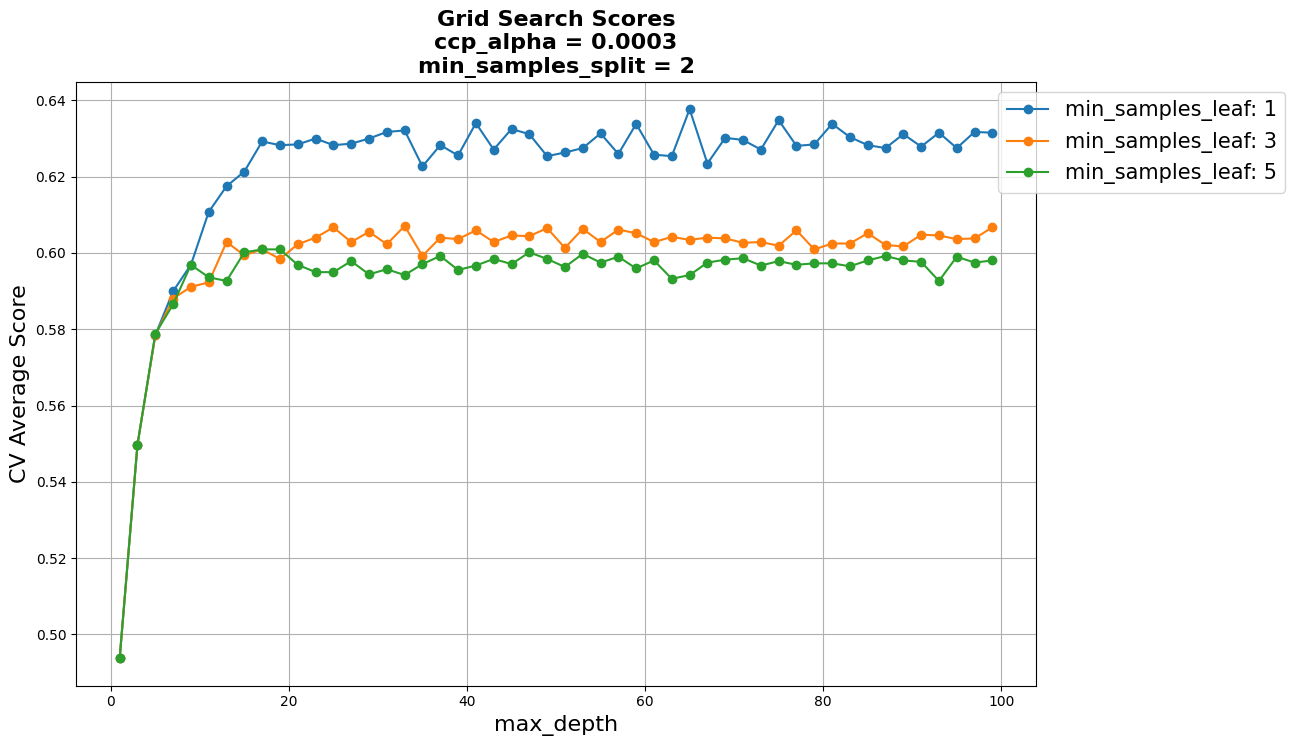

In [24]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'C', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

0.633 (+/-0.024) for {'ccp_alpha': 0.00030000000000000003, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.632 (+/-0.041) for {'ccp_alpha': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.630 (+/-0.033) for {'ccp_alpha': 0.0005, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.628 (+/-0.036) for {'ccp_alpha': 0.0002, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.038) for {'ccp_alpha': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.627 (+/-0.024) for {'ccp_alpha': 0.0004, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.037) for {'ccp_alpha': 0.0005, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.627 (+/-0.027) for {'ccp_alpha': 0.0008, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.034) for {'ccp_alpha': 0.0007, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.627 (+/-0.023) for {'ccp_alpha': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.627 (+/-0.043) for {'ccp_alpha': 0.0004, 'min_samples_leaf': 1, 'min_samples_split': 

KeyError: 'max_features'

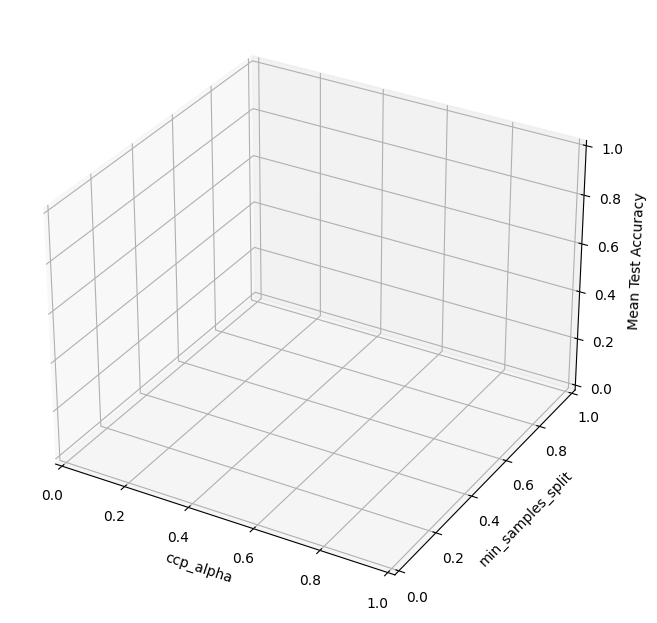

In [33]:
means = gs_results.cv_results_['mean_test_score']
stds = gs_results.cv_results_['std_test_score']
parameters = gs_results.cv_results_['params'][0].keys()
parameter_dict = {}
for param in parameters:
    parameter_dict[param] = []

plot_mean = []
for i in np.argsort(means)[::-1][0:100]:
    mean = means[i]
    std = stds[i]
    params = gs_results.cv_results_['params'][i]
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    plot_mean.append(mean)
    for key, value in params.items():
        parameter_dict[key].append(value)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = parameter_dict['ccp_alpha']
y = parameter_dict['min_samples_split']
z = plot_mean

ax.set_xlabel("ccp_alpha")
ax.set_ylabel("min_samples_split")
ax.set_zlabel("Mean Test Accuracy")

max_features_map = {"auto": 0, "sqrt": 1, "log2": 2}
max_feature_plot = [max_features_map[i] for i in parameter_dict["max_features"]]

sc = ax.scatter(x, y, z, c=max_feature_plot)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [8]:
results = pd.DataFrame(gs_results.cv_results_)
results = results.sort_values(by=['rank_test_score'])
for param in results['params'][0].keys():
    print([i for i in results['params']])
    values = [i[param] for i in results['params']]
    results.insert(0, param, values)
results

[{'ccp_alpha': 0.0006000000000000001, 'max_features': 'auto', 'min_samples_split': 32}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 8}, {'ccp_alpha': 0.0009000000000000001, 'max_features': 'auto', 'min_samples_split': 22}, {'ccp_alpha': 0.0007, 'max_features': 'sqrt', 'min_samples_split': 20}, {'ccp_alpha': 0.0006000000000000001, 'max_features': 'sqrt', 'min_samples_split': 36}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 12}, {'ccp_alpha': 0.0004, 'max_features': 'sqrt', 'min_samples_split': 2}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 32}, {'ccp_alpha': 0.0009000000000000001, 'max_features': 'auto', 'min_samples_split': 44}, {'ccp_alpha': 0.001, 'max_features': 'sqrt', 'min_samples_split': 42}, {'ccp_alpha': 0.0006000000000000001, 'max_features': 'auto', 'min_samples_split': 2}, {'ccp_alpha': 0.0007, 'max_features': 'sqrt', 'min_samples_split': 4}, {'ccp_alpha': 0.001, 'max_features': 'sqrt', 'min_samples_split':

,min_samples_split,max_features,ccp_alpha,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_features,param_min_samples_split,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
447,32,auto,0.0006,0.087081,0.004534,0.001024,0.000079,0.0006,auto,32,...,0.653125,0.014164,1,0.797188,0.792969,0.795937,0.802031,0.790312,0.795687,0.003971
579,8,auto,0.0008,0.092153,0.003414,0.001395,0.000263,0.0008,auto,8,...,0.645875,0.008791,2,0.761406,0.750313,0.753906,0.742188,0.757812,0.753125,0.006614
658,22,auto,0.0009,0.094876,0.007422,0.001146,0.000205,0.0009,auto,22,...,0.644875,0.008191,3,0.732031,0.713125,0.735000,0.718594,0.742656,0.728281,0.010857
537,20,sqrt,0.0007,0.086667,0.000755,0.001236,0.000234,0.0007,sqrt,20,...,0.644625,0.007033,4,0.784531,0.773906,0.790469,0.786406,0.774062,0.781875,0.006723
473,36,sqrt,0.0006,0.082023,0.001851,0.001104,0.000204,0.0006,sqrt,36,...,0.643125,0.007756,5,0.793125,0.793125,0.782500,0.788438,0.783125,0.788062,0.004620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,34,log2,0.0088,0.054607,0.002000,0.000887,0.000107,0.0088,log2,34,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
6233,36,sqrt,0.0086,0.081371,0.004046,0.001132,0.000215,0.0086,sqrt,36,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
6238,46,sqrt,0.0086,0.080019,0.003383,0.000877,0.000135,0.0086,sqrt,46,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
6181,28,log2,0.0085,0.056654,0.002093,0.001098,0.000397,0.0085,log2,28,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
